<a href="https://colab.research.google.com/github/SiqiHuang18/ECE239as-Deep-learning/blob/ChrisZhang/CNN_DS_test71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import torchvision.transforms
import random
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

%load_ext autoreload
%autoreload 2
from load_data import *
#from RNN_CNN import *
#from Shallow_CNN_YJ_70_1 import *
#from transformer import *
from CNN_depthwise import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
train_loader, test_loader, val_loader, _ = loader()(subject = 1,
                                             batch_size= 30,
                                             num_validation =37)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (37, 22, 1000)
Validation labels shape:  (37,)


In [0]:
criteria = F.cross_entropy

def train(epoch, device):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device).long()
        optimizer.zero_grad()
        output = model(data)
        loss = criteria(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            
def test(test_loader=test_loader, mode = 'val', device = None):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device).long()
            output = model(data)
            test_loss += criteria(output, target, reduction='sum').item() # sum up batch loss
            pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.data.view_as(pred)).long().sum().item()
        
    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('validation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

In [0]:
def main_train(epoches = 8):
    stats = {}
    stats['train'] = []
    stats['val']  = []
    device = torch.device("cuda")

    epoches = range(epoches)
    for epoch in epoches:
        train(epoch,device)
        stats['train'].append(test(train_loader, mode='train',device = device))
        stats['val'].append(test(val_loader, mode='val',device = device))

    print('Test set result:')
    test(test_loader, mode = 'val',device=device)

    stats['val']  = np.array(stats['val'])
    stats['train'] = np.array(stats['train'])

    fig, ax = plt.subplots(1, 2,figsize = (8,4))
    ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

    ax[0].legend(['validation','train'])
    ax[0].set_title('loss')

    ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

    ax[1].legend(['validation','train'])
    ax[1].set_title('accuracy')

Train data shape:  (199, 22, 1000)
Train labels shape:  (199,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/199 (0%)]	Loss: 1.385841
Train Epoch: 0 [150/199 (71%)]	Loss: 1.384905
train loss: 1.3831, Accuracy: 68/199 (34%)
validation loss: 1.3817, Accuracy: 17/38 (45%)

Train Epoch: 1 [0/199 (0%)]	Loss: 1.347254
Train Epoch: 1 [150/199 (71%)]	Loss: 1.349150
train loss: 1.3733, Accuracy: 84/199 (42%)
validation loss: 1.3684, Accuracy: 19/38 (50%)

Train Epoch: 2 [0/199 (0%)]	Loss: 1.339644
Train Epoch: 2 [150/199 (71%)]	Loss: 1.342411
train loss: 1.3538, Accuracy: 94/199 (47%)
validation loss: 1.3436, Accuracy: 20/38 (53%)

Train Epoch: 3 [0/199 (0%)]	Loss: 1.355526
Train Epoch: 3 [150/199 (71%)]	Loss: 1.333351
train loss: 1.3309, Accuracy: 96/199 (48%)
validation loss: 1.3142, Accuracy: 19/38 (50%)

Train Epoch: 4 [0/199 (0%)]	Loss: 1.342770
Train Epoch: 4 [150/199 (71%)]	Loss: 1.32923

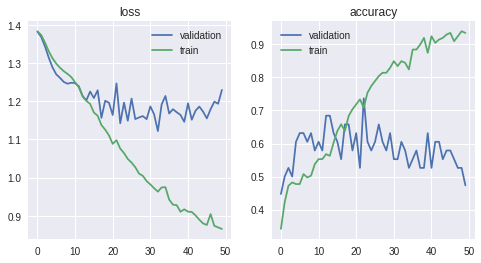

In [40]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 1,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.393535
Train Epoch: 0 [150/198 (71%)]	Loss: 1.387613
train loss: 1.3844, Accuracy: 63/198 (32%)
validation loss: 1.3842, Accuracy: 11/38 (29%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.377050
Train Epoch: 1 [150/198 (71%)]	Loss: 1.360023
train loss: 1.3779, Accuracy: 89/198 (45%)
validation loss: 1.3806, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.362172
Train Epoch: 2 [150/198 (71%)]	Loss: 1.352338
train loss: 1.3632, Accuracy: 98/198 (49%)
validation loss: 1.3724, Accuracy: 14/38 (37%)

Train Epoch: 3 [0/198 (0%)]	Loss: 1.333522
Train Epoch: 3 [150/198 (71%)]	Loss: 1.339417
train loss: 1.3412, Accuracy: 98/198 (49%)
validation loss: 1.3595, Accuracy: 18/38 (47%)

Train Epoch: 4 [0/198 (0%)]	Loss: 1.324061
Train Epoch: 4 [150/198 (71%)]	Loss: 1.33772

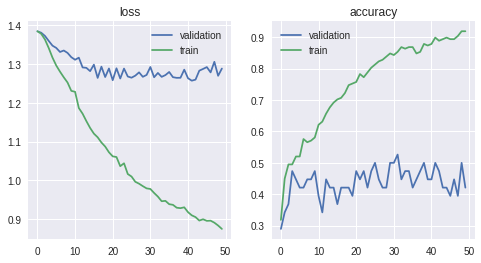

In [41]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 2,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.395279
Train Epoch: 0 [150/198 (71%)]	Loss: 1.377688
train loss: 1.3853, Accuracy: 55/198 (28%)
validation loss: 1.3863, Accuracy: 10/38 (26%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.377706
Train Epoch: 1 [150/198 (71%)]	Loss: 1.386112
train loss: 1.3822, Accuracy: 78/198 (39%)
validation loss: 1.3864, Accuracy: 8/38 (21%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.366658
Train Epoch: 2 [150/198 (71%)]	Loss: 1.345477
train loss: 1.3746, Accuracy: 93/198 (47%)
validation loss: 1.3844, Accuracy: 8/38 (21%)

Train Epoch: 3 [0/198 (0%)]	Loss: 1.371982
Train Epoch: 3 [150/198 (71%)]	Loss: 1.345926
train loss: 1.3609, Accuracy: 96/198 (48%)
validation loss: 1.3798, Accuracy: 12/38 (32%)

Train Epoch: 4 [0/198 (0%)]	Loss: 1.341145
Train Epoch: 4 [150/198 (71%)]	Loss: 1.333447


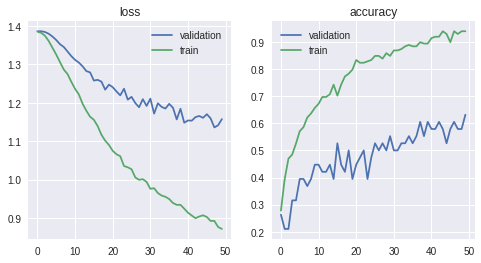

In [42]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 3,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (196, 22, 1000)
Train labels shape:  (196,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/196 (0%)]	Loss: 1.387982
Train Epoch: 0 [150/196 (71%)]	Loss: 1.386379
train loss: 1.3824, Accuracy: 85/196 (43%)
validation loss: 1.3840, Accuracy: 12/38 (32%)

Train Epoch: 1 [0/196 (0%)]	Loss: 1.365726
Train Epoch: 1 [150/196 (71%)]	Loss: 1.363335
train loss: 1.3726, Accuracy: 93/196 (47%)
validation loss: 1.3778, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/196 (0%)]	Loss: 1.341410
Train Epoch: 2 [150/196 (71%)]	Loss: 1.336890
train loss: 1.3544, Accuracy: 100/196 (51%)
validation loss: 1.3686, Accuracy: 13/38 (34%)

Train Epoch: 3 [0/196 (0%)]	Loss: 1.332248
Train Epoch: 3 [150/196 (71%)]	Loss: 1.316895
train loss: 1.3323, Accuracy: 112/196 (57%)
validation loss: 1.3587, Accuracy: 15/38 (39%)

Train Epoch: 4 [0/196 (0%)]	Loss: 1.334185
Train Epoch: 4 [150/196 (71%)]	Loss: 1.289

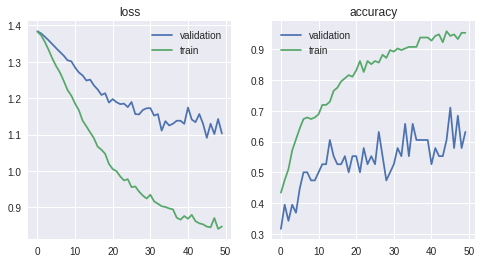

In [43]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 4,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (197, 22, 1000)
Train labels shape:  (197,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/197 (0%)]	Loss: 1.405421
Train Epoch: 0 [150/197 (71%)]	Loss: 1.394014
train loss: 1.3855, Accuracy: 62/197 (31%)
validation loss: 1.3856, Accuracy: 14/38 (37%)

Train Epoch: 1 [0/197 (0%)]	Loss: 1.378439
Train Epoch: 1 [150/197 (71%)]	Loss: 1.372472
train loss: 1.3805, Accuracy: 81/197 (41%)
validation loss: 1.3841, Accuracy: 12/38 (32%)

Train Epoch: 2 [0/197 (0%)]	Loss: 1.371702
Train Epoch: 2 [150/197 (71%)]	Loss: 1.355282
train loss: 1.3635, Accuracy: 94/197 (48%)
validation loss: 1.3795, Accuracy: 10/38 (26%)

Train Epoch: 3 [0/197 (0%)]	Loss: 1.328602
Train Epoch: 3 [150/197 (71%)]	Loss: 1.344554
train loss: 1.3388, Accuracy: 100/197 (51%)
validation loss: 1.3709, Accuracy: 12/38 (32%)

Train Epoch: 4 [0/197 (0%)]	Loss: 1.349063
Train Epoch: 4 [150/197 (71%)]	Loss: 1.2915

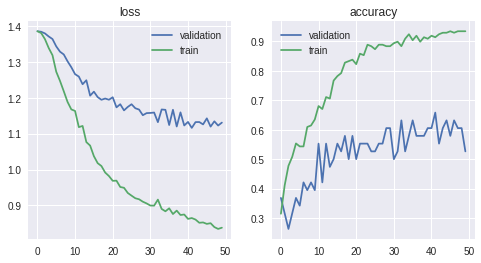

In [44]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 5,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (198, 22, 1000)
Train labels shape:  (198,)
test data shape:  (49, 22, 1000)
test labels shape:  (49,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/198 (0%)]	Loss: 1.379560
Train Epoch: 0 [150/198 (71%)]	Loss: 1.375779
train loss: 1.3840, Accuracy: 59/198 (30%)
validation loss: 1.3846, Accuracy: 12/38 (32%)

Train Epoch: 1 [0/198 (0%)]	Loss: 1.372222
Train Epoch: 1 [150/198 (71%)]	Loss: 1.357953
train loss: 1.3768, Accuracy: 89/198 (45%)
validation loss: 1.3786, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/198 (0%)]	Loss: 1.345691
Train Epoch: 2 [150/198 (71%)]	Loss: 1.363530
train loss: 1.3613, Accuracy: 96/198 (48%)
validation loss: 1.3650, Accuracy: 15/38 (39%)

Train Epoch: 3 [0/198 (0%)]	Loss: 1.337203
Train Epoch: 3 [150/198 (71%)]	Loss: 1.358404
train loss: 1.3396, Accuracy: 109/198 (55%)
validation loss: 1.3491, Accuracy: 17/38 (45%)

Train Epoch: 4 [0/198 (0%)]	Loss: 1.347905
Train Epoch: 4 [150/198 (71%)]	Loss: 1.3262

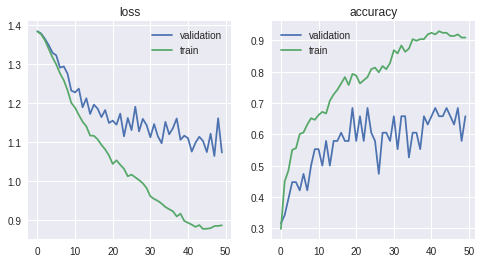

In [45]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 6,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (200, 22, 1000)
Train labels shape:  (200,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/200 (0%)]	Loss: 1.385000
Train Epoch: 0 [150/200 (71%)]	Loss: 1.376535
train loss: 1.3810, Accuracy: 88/200 (44%)
validation loss: 1.3843, Accuracy: 15/38 (39%)

Train Epoch: 1 [0/200 (0%)]	Loss: 1.360045
Train Epoch: 1 [150/200 (71%)]	Loss: 1.352415
train loss: 1.3602, Accuracy: 104/200 (52%)
validation loss: 1.3750, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/200 (0%)]	Loss: 1.316218
Train Epoch: 2 [150/200 (71%)]	Loss: 1.315835
train loss: 1.3170, Accuracy: 111/200 (56%)
validation loss: 1.3544, Accuracy: 14/38 (37%)

Train Epoch: 3 [0/200 (0%)]	Loss: 1.277405
Train Epoch: 3 [150/200 (71%)]	Loss: 1.253012
train loss: 1.2777, Accuracy: 113/200 (56%)
validation loss: 1.3384, Accuracy: 15/38 (39%)

Train Epoch: 4 [0/200 (0%)]	Loss: 1.227111
Train Epoch: 4 [150/200 (71%)]	Loss: 1.21

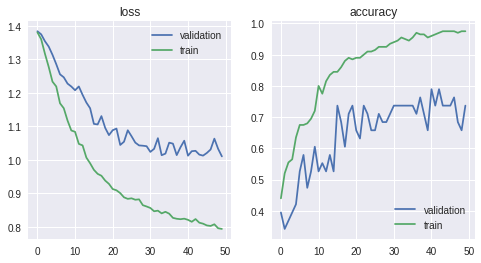

In [46]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 7,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (194, 22, 1000)
Train labels shape:  (194,)
test data shape:  (50, 22, 1000)
test labels shape:  (50,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/194 (0%)]	Loss: 1.374445
Train Epoch: 0 [150/194 (71%)]	Loss: 1.383268
train loss: 1.3823, Accuracy: 75/194 (39%)
validation loss: 1.3839, Accuracy: 16/38 (42%)

Train Epoch: 1 [0/194 (0%)]	Loss: 1.364240
Train Epoch: 1 [150/194 (71%)]	Loss: 1.336430
train loss: 1.3681, Accuracy: 90/194 (46%)
validation loss: 1.3748, Accuracy: 15/38 (39%)

Train Epoch: 2 [0/194 (0%)]	Loss: 1.334821
Train Epoch: 2 [150/194 (71%)]	Loss: 1.311991
train loss: 1.3380, Accuracy: 103/194 (53%)
validation loss: 1.3597, Accuracy: 16/38 (42%)

Train Epoch: 3 [0/194 (0%)]	Loss: 1.313718
Train Epoch: 3 [150/194 (71%)]	Loss: 1.229502
train loss: 1.2986, Accuracy: 106/194 (55%)
validation loss: 1.3418, Accuracy: 14/38 (37%)

Train Epoch: 4 [0/194 (0%)]	Loss: 1.342481
Train Epoch: 4 [150/194 (71%)]	Loss: 1.249

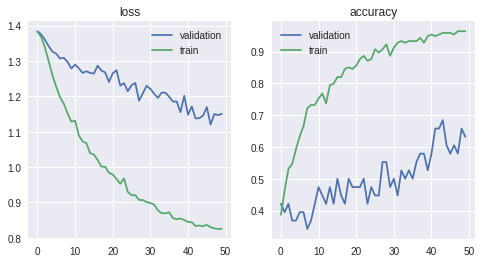

In [47]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 8,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (193, 22, 1000)
Train labels shape:  (193,)
test data shape:  (47, 22, 1000)
test labels shape:  (47,)
Validation data shape:  (38, 22, 1000)
Validation labels shape:  (38,)
Train Epoch: 0 [0/193 (0%)]	Loss: 1.391894
Train Epoch: 0 [150/193 (71%)]	Loss: 1.372474
train loss: 1.3810, Accuracy: 72/193 (37%)
validation loss: 1.3846, Accuracy: 13/38 (34%)

Train Epoch: 1 [0/193 (0%)]	Loss: 1.365773
Train Epoch: 1 [150/193 (71%)]	Loss: 1.338276
train loss: 1.3690, Accuracy: 92/193 (48%)
validation loss: 1.3812, Accuracy: 13/38 (34%)

Train Epoch: 2 [0/193 (0%)]	Loss: 1.342338
Train Epoch: 2 [150/193 (71%)]	Loss: 1.342424
train loss: 1.3482, Accuracy: 99/193 (51%)
validation loss: 1.3750, Accuracy: 12/38 (32%)

Train Epoch: 3 [0/193 (0%)]	Loss: 1.313392
Train Epoch: 3 [150/193 (71%)]	Loss: 1.289225
train loss: 1.3223, Accuracy: 115/193 (60%)
validation loss: 1.3654, Accuracy: 12/38 (32%)

Train Epoch: 4 [0/193 (0%)]	Loss: 1.316221
Train Epoch: 4 [150/193 (71%)]	Loss: 1.3234

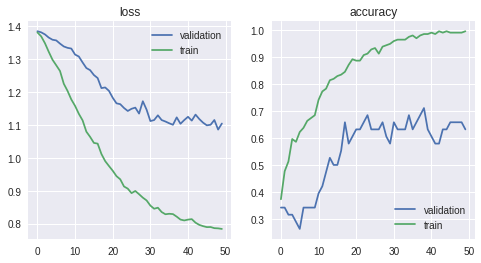

In [48]:
device = torch.device("cuda")
train_loader, test_loader, val_loader,_ = loader()(subject= 9,
                                             batch_size= 30,
                                             num_validation =38)
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 40)

Train data shape:  (1782, 22, 1000)
Train labels shape:  (1782,)
test data shape:  (443, 22, 1000)
test labels shape:  (443,)
Validation data shape:  (333, 22, 1000)
Validation labels shape:  (333,)
--------------------
data size: torch.Size([30, 1, 22, 1000])
Train Epoch: 0 [0/1782 (0%)]	Loss: 1.386992
Train Epoch: 0 [150/1782 (8%)]	Loss: 1.378496
Train Epoch: 0 [300/1782 (17%)]	Loss: 1.374729
Train Epoch: 0 [450/1782 (25%)]	Loss: 1.385333
Train Epoch: 0 [600/1782 (33%)]	Loss: 1.383405
Train Epoch: 0 [750/1782 (42%)]	Loss: 1.382667
Train Epoch: 0 [900/1782 (50%)]	Loss: 1.363793
Train Epoch: 0 [1050/1782 (58%)]	Loss: 1.372745
Train Epoch: 0 [1200/1782 (67%)]	Loss: 1.371712
Train Epoch: 0 [1350/1782 (75%)]	Loss: 1.366244
Train Epoch: 0 [1500/1782 (83%)]	Loss: 1.358443
Train Epoch: 0 [1650/1782 (92%)]	Loss: 1.343022
train loss: 1.3334, Accuracy: 740/1782 (42%)
validation loss: 1.3464, Accuracy: 120/333 (36%)

Train Epoch: 1 [0/1782 (0%)]	Loss: 1.376013
Train Epoch: 1 [150/1782 (8%)]	Loss

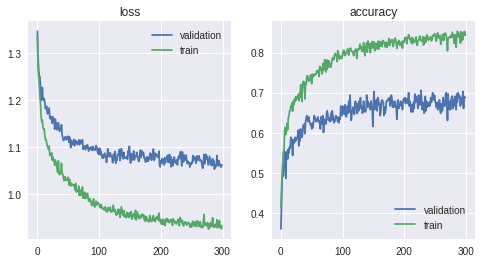

In [49]:
train_loader, test_loader, val_loader, test_loaders = loader()(subject = "ALL",
                                                            batch_size = 30,
                                                            num_validation = 37)
print('-'*20)
for batch_idx, (data, target) in enumerate(train_loader):
    print('data size:',data.shape)
    break
model = EEGNet().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
main_train(epoches = 300)
for i in range(9):
    print('This is test set result for subject{}:'.format(i+1))
    test(test_loaders[i], mode = 'val',device=device)